In [25]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e9e0d5e489c241459a20807f7f3d89ca = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='EAJkNiaWi2hlC6MSsw7zpCe6B8xohp-XvrLmZRijJgbE',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

body = client_e9e0d5e489c241459a20807f7f3d89ca.get_object(Bucket='nftsalesanalyticsdashboard-donotdelete-pr-wu60nia5soi1y6',Key='NFT_Sales.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Date,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
0,22-06-2017,0.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,23-06-2017,1020.30,19,8.0,0,19.0,53.70,1020.30,19.0,8.0,0.0
2,24-06-2017,2261.14,40,21.0,0,21.0,56.53,1240.84,21.0,13.0,0.0
3,25-06-2017,2778.69,53,28.0,0,13.0,52.43,517.55,13.0,7.0,0.0
4,26-06-2017,3203.32,67,34.0,0,14.0,47.81,424.63,14.0,6.0,0.0


In [26]:
print(df.to_string())

            Date  Sales_USD_cumsum  Number_of_Sales_cumsum  Active_Market_Wallets_cumsum  Primary_Sales_cumsum  Secondary_Sales_cumsum  AverageUSD_cum     Sales_USD  Number_of_Sales  Active_Market_Wallets  Primary_Sales
0     22-06-2017      0.000000e+00                       0                           0.0                     0                     NaN             NaN           NaN              NaN                    NaN            NaN
1     23-06-2017      1.020300e+03                      19                           8.0                     0                    19.0           53.70  1.020300e+03             19.0                    8.0            0.0
2     24-06-2017      2.261140e+03                      40                          21.0                     0                    21.0           56.53  1.240840e+03             21.0                   13.0            0.0
3     25-06-2017      2.778690e+03                      53                          28.0                     0          

In [27]:
df.isnull().any()

Date                            False
Sales_USD_cumsum                False
Number_of_Sales_cumsum          False
Active_Market_Wallets_cumsum     True
Primary_Sales_cumsum            False
Secondary_Sales_cumsum           True
AverageUSD_cum                   True
Sales_USD                        True
Number_of_Sales                  True
Active_Market_Wallets            True
Primary_Sales                    True
dtype: bool

In [28]:
from sklearn.impute import SimpleImputer

In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [32]:
import numpy as np
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
imputer = imputer.fit(x[:, 1:])
x[:, 1:] = imputer.transform(x[:, 1:])

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [34]:
import matplotlib.pyplot as plt

In [35]:
x = df['Date'].values
y = df['Sales_USD'].values

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
regressor = DecisionTreeRegressor()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


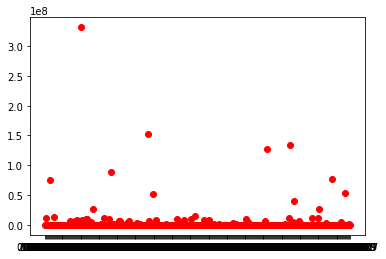

In [40]:
plt.scatter(x_test, y_test, color = 'red')

In [41]:
df.head()

,Date,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
0,22-06-2017,0.00,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,23-06-2017,1020.30,19,8.0,0,19.0,53.70,1020.30,19.0,8.0,0.0
2,24-06-2017,2261.14,40,21.0,0,21.0,56.53,1240.84,21.0,13.0,0.0
3,25-06-2017,2778.69,53,28.0,0,13.0,52.43,517.55,13.0,7.0,0.0
4,26-06-2017,3203.32,67,34.0,0,14.0,47.81,424.63,14.0,6.0,0.0


In [42]:
x = df.iloc[:,8:11].values
y = df.iloc[:,7:8].values

In [43]:
x.shape

(1606, 3)

In [44]:
y.shape

(1606, 1)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


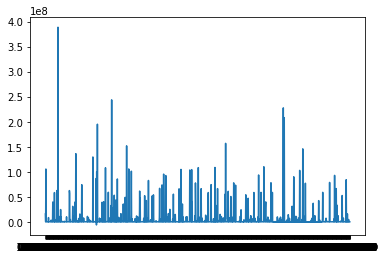

In [45]:
plt.plot(x_train,y_train)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


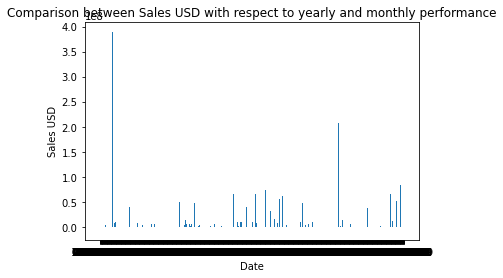

In [46]:
plt.bar(x_train,y_train)
plt.title('Comparison between Sales USD with respect to yearly and monthly performance')
plt.xlabel('Date')
plt.ylabel('Sales USD')
plt.show()

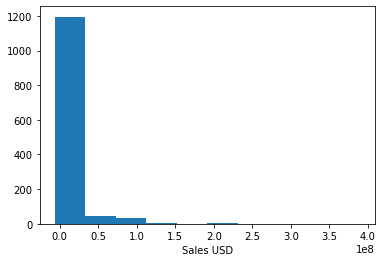

In [47]:
plt.hist(y_train, )
plt.xlabel('Sales USD')
plt.show()